### Problem Statement

The primary objective is to analyze how online learning environments impact student mental health. By exploring various factors such as academic pressure, social isolation, and lifestyle changes, the dataset seeks to uncover patterns and correlations that can inform interventions and support mechanisms for students facing mental health challenges.

### Column Description

Name Student's first name (non-essential for analysis; can be anonymized)

 Gender Gender of the respondent (Male/Female)

 Age Age in years

 Education Level Academic level (e.g., Class 8, BTech, MSc)

 Screen Time (hrs/day) Average screen time per day during online learning

 Sleep Duration (hrs) Average daily sleep duration

Physical Activity (hrs/week) Weekly exercise time

 Stress Level Reported stress level (Low, Medium, High)

 Anxious Before Exams Whether the student feels anxious before exams (Yes/No)

 Academic Performance Change Self-assessed change in academic performance

In [51]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')
import datetime as dt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.metrics import classification_report
from xgboost import XGBClassifier

In [52]:
df = pd.read_csv('C:\\Users\\riddh\\Downloads\\Student Mental Health Analysis During Online Learning.csv')

In [53]:
df

,Name,Gender,Age,Education Level,Screen Time (hrs/day),Sleep Duration (hrs),Physical Activity (hrs/week),Stress Level,Anxious Before Exams,Academic Performance Change
0,Aarav,Male,15,Class 8,7.1,8.9,9.3,Medium,No,Same
1,Meera,Female,25,MSc,3.3,5.0,0.2,Medium,No,Same
2,Ishaan,Male,20,BTech,9.5,5.4,6.2,Medium,No,Same
3,Aditya,Male,20,BA,10.8,5.6,5.5,High,Yes,Same
4,Anika,Female,17,Class 11,2.8,5.4,3.1,Medium,Yes,Same
...,...,...,...,...,...,...,...,...,...,...
995,Diya,Female,26,MA,11.3,6.8,9.1,Medium,No,Same
996,Aarav,Male,20,BTech,5.5,6.7,6.8,Low,Yes,Same
997,Myra,Female,15,Class 9,7.1,4.1,1.9,Low,Yes,Declined
998,Myra,Female,20,BA,4.4,7.5,4.5,Medium,No,Improved


In [29]:
df.shape

(1000, 10)

In [30]:
df.columns

Index(['Name', 'Gender', 'Age', 'Education Level', 'Screen Time (hrs/day)',
       'Sleep Duration (hrs)', 'Physical Activity (hrs/week)', 'Stress Level',
       'Anxious Before Exams', 'Academic Performance Change'],
      dtype='object')

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Name                          1000 non-null   object 
 1   Gender                        1000 non-null   object 
 2   Age                           1000 non-null   int64  
 3   Education Level               1000 non-null   object 
 4   Screen Time (hrs/day)         1000 non-null   float64
 5   Sleep Duration (hrs)          1000 non-null   float64
 6   Physical Activity (hrs/week)  1000 non-null   float64
 7   Stress Level                  1000 non-null   object 
 8   Anxious Before Exams          1000 non-null   object 
 9   Academic Performance Change   1000 non-null   object 
dtypes: float64(3), int64(1), object(6)
memory usage: 78.3+ KB


In [32]:
df.isna().sum()

Name                            0
Gender                          0
Age                             0
Education Level                 0
Screen Time (hrs/day)           0
Sleep Duration (hrs)            0
Physical Activity (hrs/week)    0
Stress Level                    0
Anxious Before Exams            0
Academic Performance Change     0
dtype: int64

In [33]:
df.duplicated().sum()

np.int64(0)

In [34]:
df.describe()

,Age,Screen Time (hrs/day),Sleep Duration (hrs),Physical Activity (hrs/week)
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,20.342000,6.909200,6.450800,5.017600
std,3.459914,2.907106,1.466407,2.930344
min,15.000000,2.000000,4.000000,0.000000
25%,17.000000,4.400000,5.100000,2.600000
50%,20.000000,6.900000,6.500000,5.000000
75%,23.000000,9.500000,7.700000,7.600000
max,26.000000,12.000000,9.000000,10.000000


In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Name                          1000 non-null   object 
 1   Gender                        1000 non-null   object 
 2   Age                           1000 non-null   int64  
 3   Education Level               1000 non-null   object 
 4   Screen Time (hrs/day)         1000 non-null   float64
 5   Sleep Duration (hrs)          1000 non-null   float64
 6   Physical Activity (hrs/week)  1000 non-null   float64
 7   Stress Level                  1000 non-null   object 
 8   Anxious Before Exams          1000 non-null   object 
 9   Academic Performance Change   1000 non-null   object 
dtypes: float64(3), int64(1), object(6)
memory usage: 78.3+ KB


In [36]:
df.head()

,Name,Gender,Age,Education Level,Screen Time (hrs/day),Sleep Duration (hrs),Physical Activity (hrs/week),Stress Level,Anxious Before Exams,Academic Performance Change
0,Aarav,Male,15,Class 8,7.1,8.9,9.3,Medium,No,Same
1,Meera,Female,25,MSc,3.3,5.0,0.2,Medium,No,Same
2,Ishaan,Male,20,BTech,9.5,5.4,6.2,Medium,No,Same
3,Aditya,Male,20,BA,10.8,5.6,5.5,High,Yes,Same
4,Anika,Female,17,Class 11,2.8,5.4,3.1,Medium,Yes,Same


In [37]:
df.shape

(1000, 10)

### Finding Outliers

In [14]:
numerical_value = df.select_dtypes(exclude="object")
numerical_value

,Age,Screen Time (hrs/day),Sleep Duration (hrs),Physical Activity (hrs/week)
0,15,7.1,8.9,9.3
1,25,3.3,5.0,0.2
2,20,9.5,5.4,6.2
3,20,10.8,5.6,5.5
4,17,2.8,5.4,3.1
...,...,...,...,...
995,26,11.3,6.8,9.1
996,20,5.5,6.7,6.8
997,15,7.1,4.1,1.9
998,20,4.4,7.5,4.5


<Axes: xlabel='Age'>

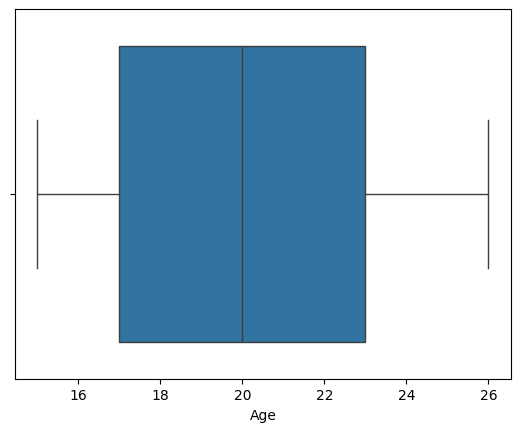

In [15]:
sns.boxplot(x="Age",data=df)

<Axes: xlabel='Screen Time (hrs/day)'>

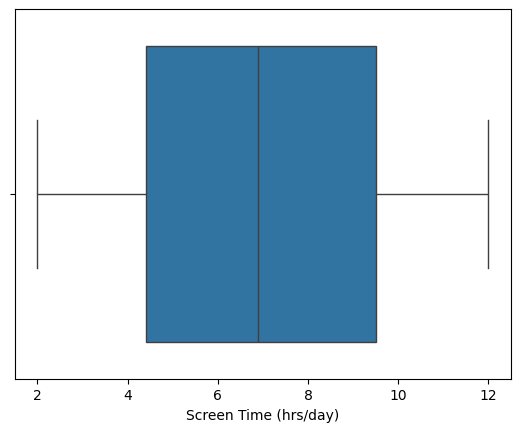

In [16]:
sns.boxplot(x="Screen Time (hrs/day)",data=df)

<Axes: xlabel='Sleep Duration (hrs)'>

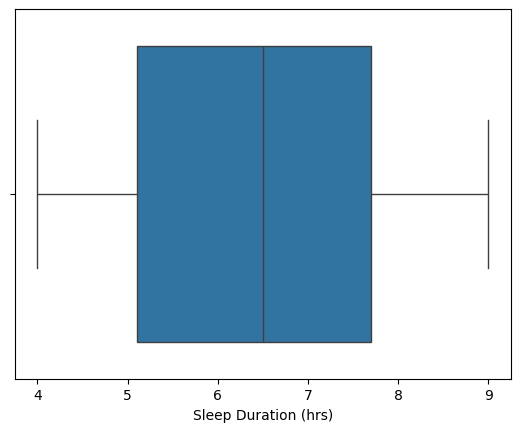

In [17]:
sns.boxplot(x="Sleep Duration (hrs)",data=df)

<Axes: xlabel='Physical Activity (hrs/week)'>

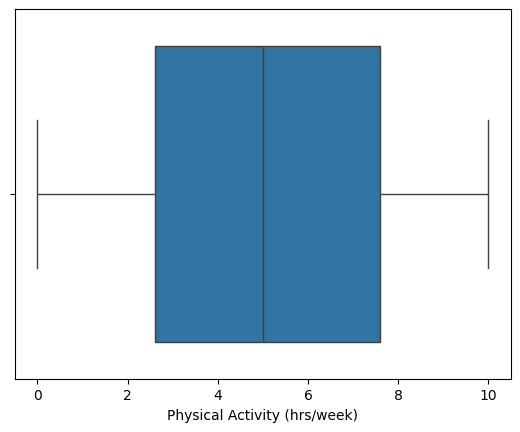

In [18]:
sns.boxplot(x="Physical Activity (hrs/week)",data=df)

### Performing Exploratory Data Analysis(EDA)

In [19]:
df['Stress Level'].value_counts()

Stress Level
Medium    492
Low       327
High      181
Name: count, dtype: int64

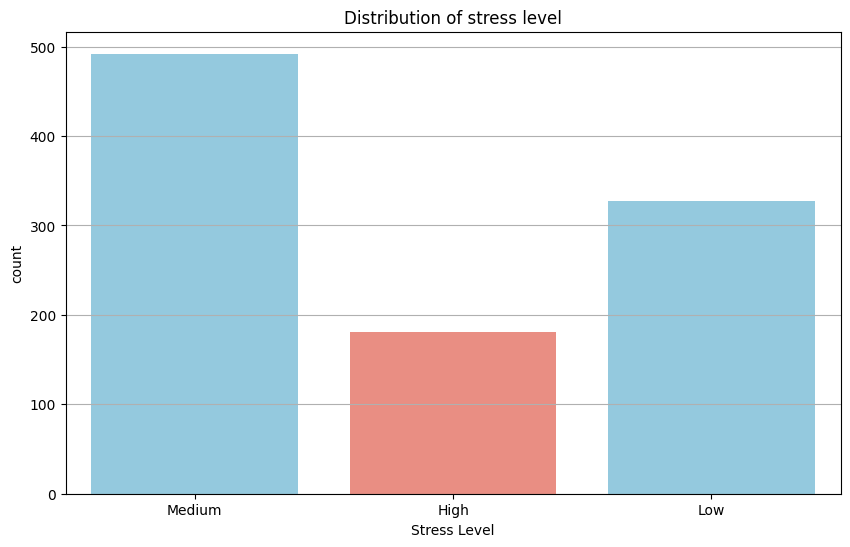

In [22]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Stress Level', palette=['skyblue', 'salmon'])
plt.title('Distribution of stress level')
plt.xlabel('Stress Level')
plt.grid(axis='y')
plt.show()

Observation:

           * The count plot indicates that the majority of students experience a medium level of stress.

### Compare Stress level with Age

In [23]:
df['Age'].unique()

array([15, 25, 20, 17, 23, 22, 16, 21, 18, 19, 26, 24])

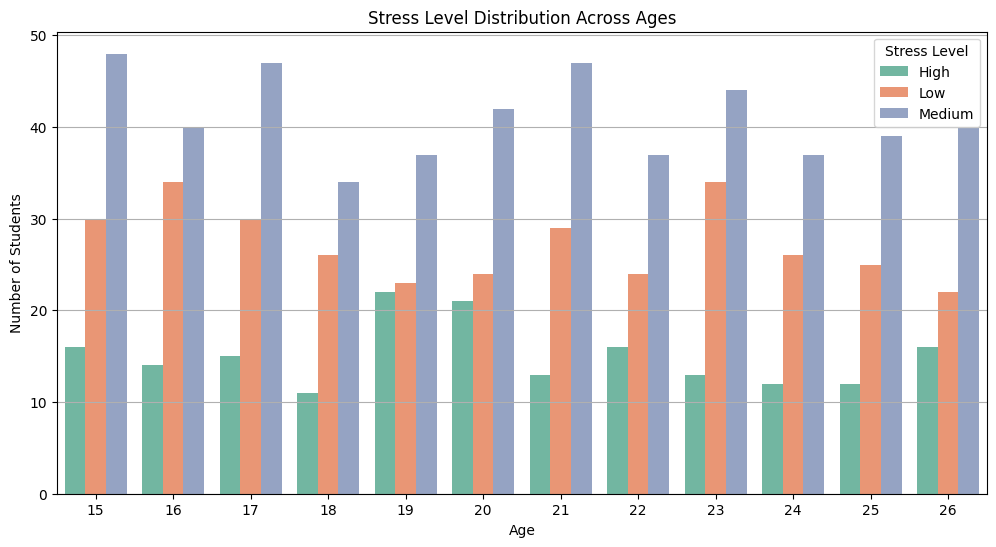

In [37]:
age_stress = df.groupby(['Age', 'Stress Level']).size().reset_index(name='Count')
plt.figure(figsize=(12, 6))
sns.barplot(data=age_stress, x='Age', y='Count', hue='Stress Level', palette='Set2')
plt.title('Stress Level Distribution Across Ages')
plt.xlabel('Age')
plt.ylabel('Number of Students')
plt.grid(axis='y')
plt.show()

Observation:

          * The bar chart shows how stress levels vary across different ages:
          * Stress level distribution is not uniform. C ertain ages (like 20–22) have a higher number of students with high or medium stress, indicating these ages might be more stressful possibly due to academic pressure or transition years.



### Compare Stress level with Education Level

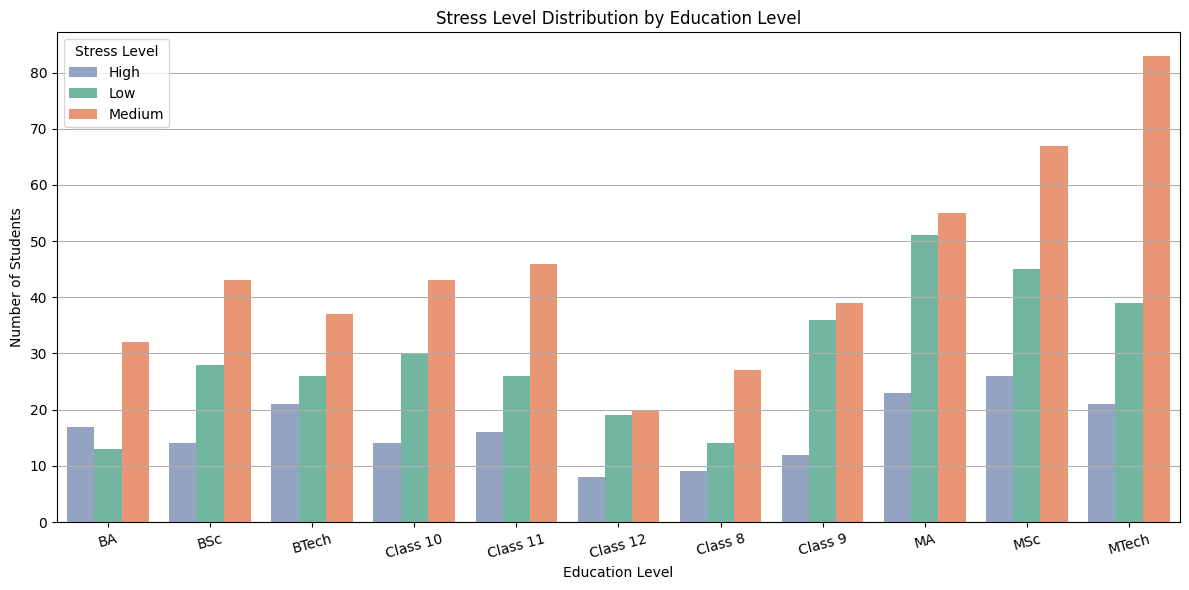

In [13]:
edu_stress = df.groupby(['Education Level', 'Stress Level']).size().reset_index(name='Count')
plt.figure(figsize=(12, 6))
sns.barplot(data=edu_stress, x='Education Level', y='Count', hue='Stress Level', 
            palette={'Low': '#66c2a5', 'Medium': '#fc8d62', 'High': '#8da0cb'})  # Color palette
plt.title('Stress Level Distribution by Education Level')
plt.xlabel('Education Level')
plt.ylabel('Number of Students')
plt.grid(axis='y')
plt.legend(title='Stress Level')
plt.xticks(rotation=15)
plt.tight_layout()
plt.show()

Observation:

           * Graduates and Postgraduates experience high and medium level of stress.
           * High school students experience low level of stress.
           

### Compare Stress level with Screen Time (hrs/day)

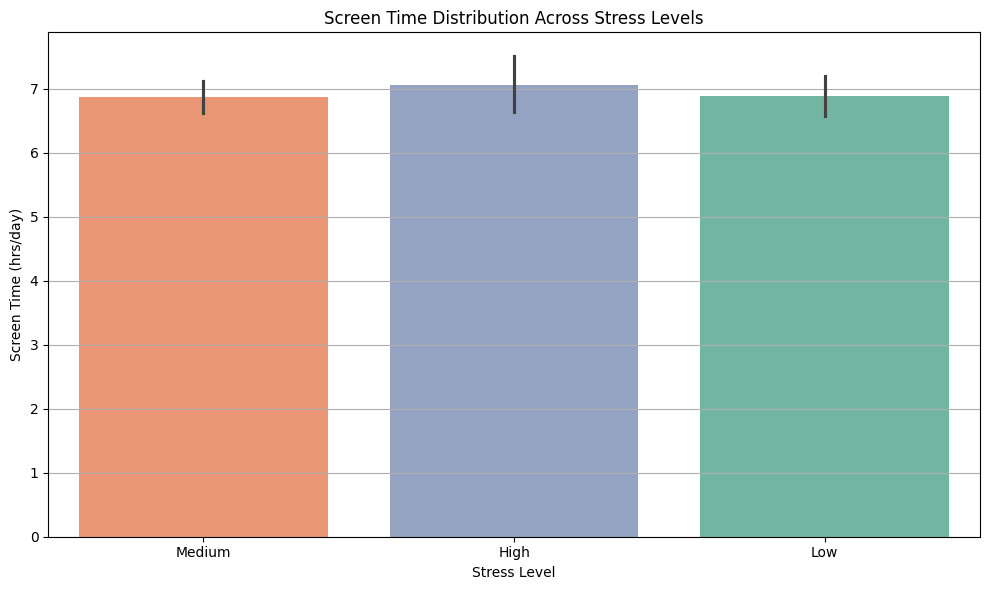

In [18]:
plt.figure(figsize=(10, 6))
sns.barplot(data=df, x='Stress Level', y='Screen Time (hrs/day)',
            palette={'Low': '#66c2a5', 'Medium': '#fc8d62', 'High': '#8da0cb'})  
plt.title('Screen Time Distribution Across Stress Levels')
plt.xlabel('Stress Level')
plt.ylabel('Screen Time (hrs/day)')
plt.grid(axis='y')
plt.tight_layout()
plt.show()


Observation:

          * High Stress Level students tend to have the highest average screen time.

          * Medium and Low Stress Level students have moderate screen time.

         

### Compare Stress level with Sleep Duration (hrs)

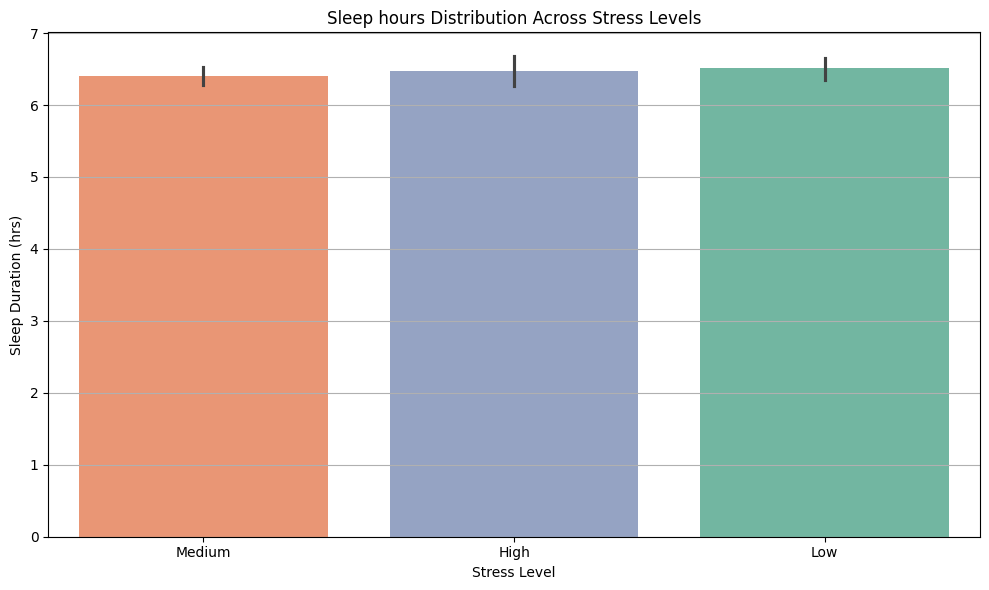

In [20]:
plt.figure(figsize=(10, 6))
sns.barplot(data=df, x='Stress Level', y='Sleep Duration (hrs)',
            palette={'Low': '#66c2a5', 'Medium': '#fc8d62', 'High': '#8da0cb'})  
plt.title('Sleep hours Distribution Across Stress Levels')
plt.xlabel('Stress Level')
plt.ylabel('Sleep Duration (hrs)')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

Observation:
            
          * Students with Low Stress have the highest sleep duration.
          

### Compare Stress level with Physical Activity (hrs/week)

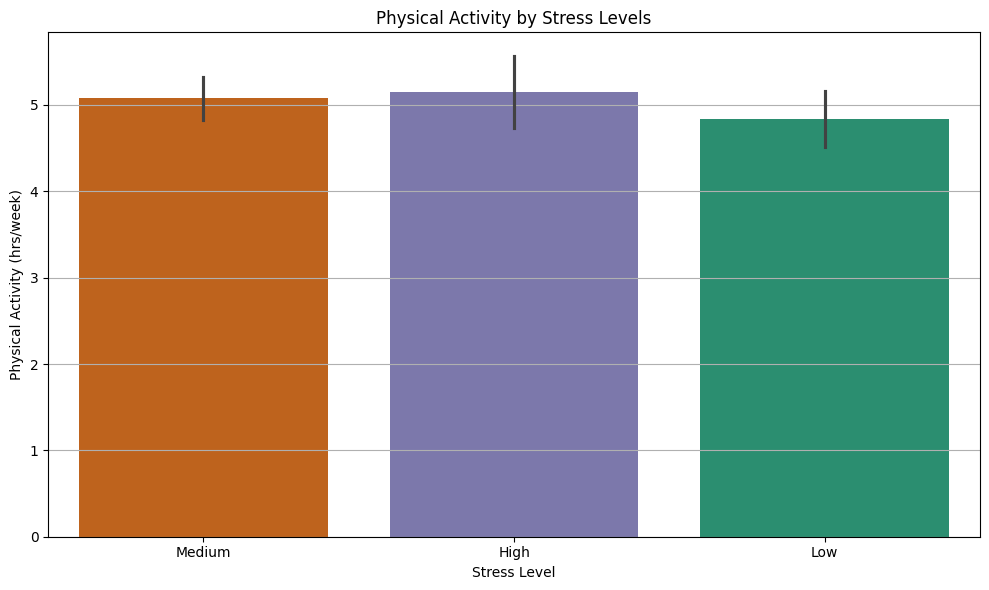

In [23]:
plt.figure(figsize=(10, 6))
sns.barplot(data=df, x='Stress Level', y='Physical Activity (hrs/week)',
            palette={'Low': '#1b9e77', 'Medium': '#d95f02', 'High': '#7570b3'})  
plt.title('Physical Activity by Stress Levels')
plt.xlabel('Stress Level')
plt.ylabel('Physical Activity (hrs/week)')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

Observation:

           * High Stress students show the more physical activity than Low stress students.

### Comapre Stress Level with Anxious Before Exam

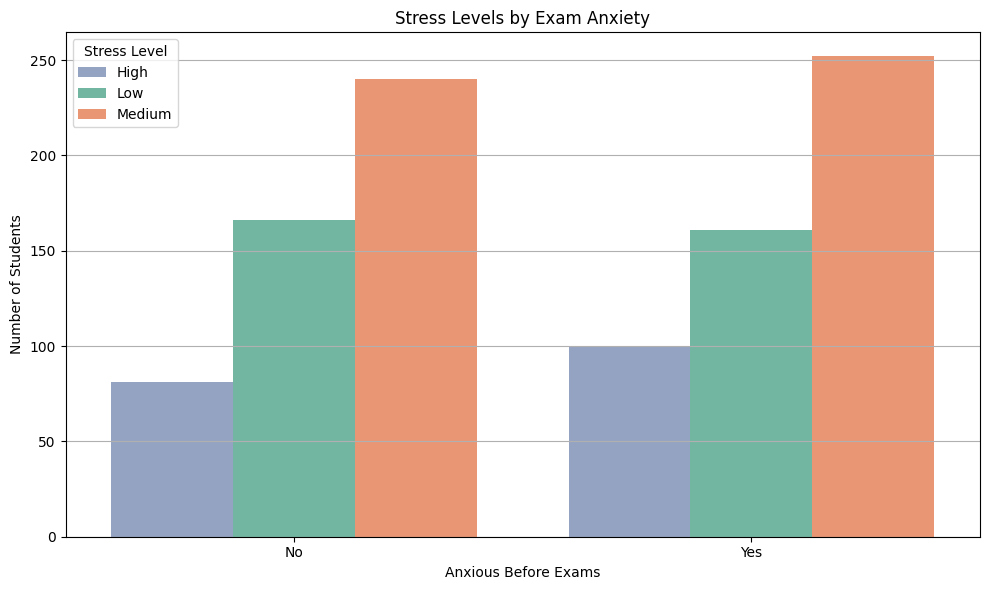

In [8]:
anxiety_stress = df.groupby(['Anxious Before Exams', 'Stress Level']).size().reset_index(name='Count')
plt.figure(figsize=(10, 6))
sns.barplot(data=anxiety_stress, x='Anxious Before Exams', y='Count', hue='Stress Level',
            palette={'Low': '#66c2a5', 'Medium': '#fc8d62', 'High': '#8da0cb'})  
plt.title('Stress Levels by Exam Anxiety')
plt.xlabel('Anxious Before Exams')
plt.ylabel('Number of Students')
plt.grid(axis='y')
plt.legend(title='Stress Level')
plt.tight_layout()
plt.show()


Observation:

           * From the above graph we can see that
           * Students who feel anxious before exams tend to have higher stress levels.
           

In [4]:
num= df.select_dtypes(include='number')
num

,Age,Screen Time (hrs/day),Sleep Duration (hrs),Physical Activity (hrs/week)
0,15,7.1,8.9,9.3
1,25,3.3,5.0,0.2
2,20,9.5,5.4,6.2
3,20,10.8,5.6,5.5
4,17,2.8,5.4,3.1
...,...,...,...,...
995,26,11.3,6.8,9.1
996,20,5.5,6.7,6.8
997,15,7.1,4.1,1.9
998,20,4.4,7.5,4.5


In [5]:
correlation=num.corr()
correlation

,Age,Screen Time (hrs/day),Sleep Duration (hrs),Physical Activity (hrs/week)
Age,1.000000,0.008982,-0.010609,-0.033600
Screen Time (hrs/day),0.008982,1.000000,0.011314,0.028464
Sleep Duration (hrs),-0.010609,0.011314,1.000000,-0.013407
Physical Activity (hrs/week),-0.033600,0.028464,-0.013407,1.000000


<Axes: >

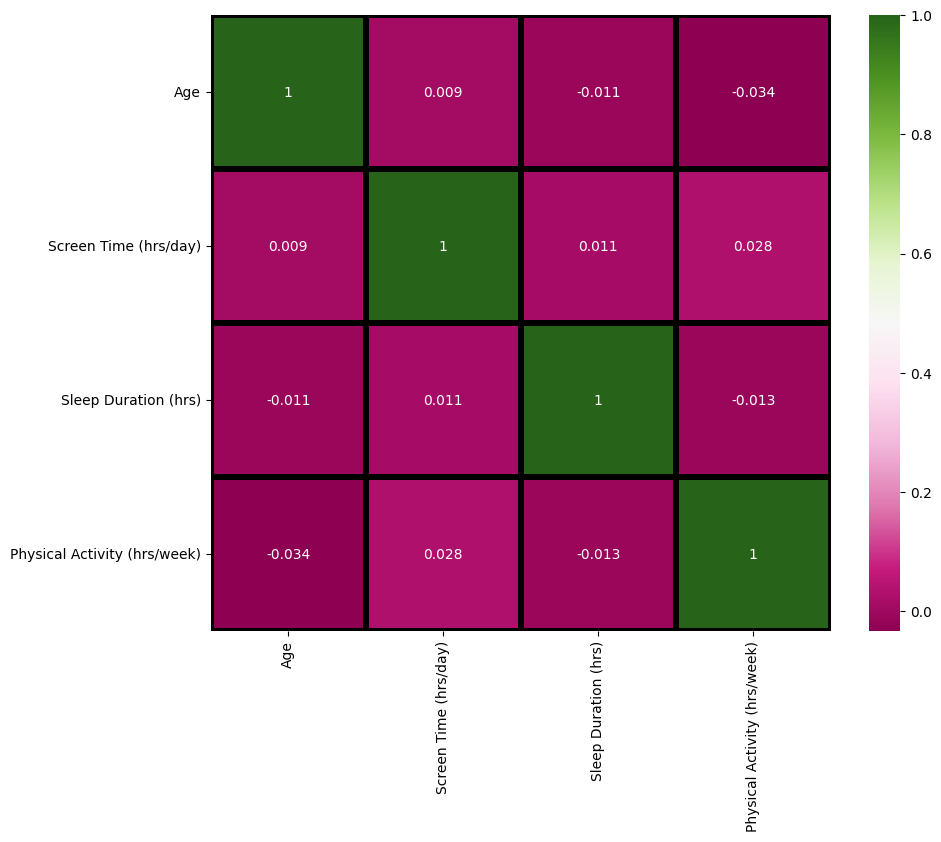

In [7]:
plt.figure(figsize=(10,8))
sns.heatmap(num.corr(),annot=True,linewidths=4,linecolor='k',cmap='PiYG')

Observation:

            * Positive correlation between Sleep Duration and Physical Activity.
            * Screen time have negative correlation with sleep duration and physical activity.

     